# Lab - Least Squares Regression

In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
x = np.array([1,2,3,4,5,6,7,8])
y = np.array([15,32,66,45,90,153,170,200])

In [3]:
%matplotlib inline

Create a scatter graph

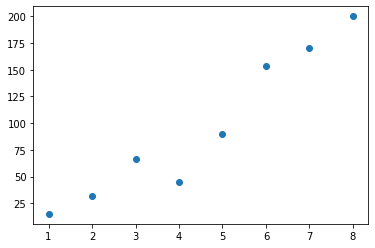

In [4]:
plt.scatter(x, y)

To create a linear regression model we need to build a simple linear function:

# Y = mX + b

## $m = \frac{N * \sum (xy) - \sum (x)\sum (y)}{N * \sum X^{2}-(\sum x)^{2}}$

## $b = \frac{\sum y - m\sum x}{N}$

## Where do these formulas come from?

Root mean square error defined as

$
\begin{align}
L(\theta) = \sum_{i=1}^{N} ( y_i - \theta x_i)^2 
\end{align}
$, where $\theta$ is model's parameters.

If the model is chosen as paired linear regression, then $\theta = [a,b]$ are coefficients of the equation of the line.

The partial derivatives of this function are:

$
\begin{align}
\frac{\partial L}{\partial a} = \left (\sum_{i=1}^N ( y_i - (ax_i + b))^2 \right)'_a =
\end{align}
$

= (chain rule + additivity of the derivative, allowing differentiation under the sum sign) = 

$
\begin{align}
= \sum_{i=1}^N[2(y_i - (ax_i+b))(y_i-(ax_i+b))'_a] =
\end{align}
$

$
\begin{align}
= 2 \sum_{i=1}^N [(y_i - ax_i -b) (0 - (x_i + 0)) ] = 2 \sum_{i=1}^N [(y_i - ax_i -b) (-x_i)] =
\end{align}
$

$
\begin{align}
= 2 \sum_{i=1}^N (ax_i^2 + bx_i - x_i y_i)
\end{align}
$

and

$
\begin{align}
\frac{\partial L}{\partial b} = \left( \sum_{i=1}^N (y_i - (ax_i + b))^2 \right)'_b=
\end{align}
$

$
\begin{align}
= \sum_{i=1}^n [2 (y_i - (ax_i + b)) (y_i - (ax_i + b))'_b] = 2 \sum [(y_i - ax_i -b)(0 - (0 +1))] =
\end{align}
$

$
\begin{align}
=2 \sum_{i=1}^N \left( a x_i + b - y_i \right)
\end{align}
$

Gradient's minimum of the loss function is hence given by the floowing system of equations

$
\begin{align}
\begin{cases}\frac{\partial L}{\partial a} = 0 \\\frac{\partial L}{\partial b} = 0\end{cases} \Rightarrow \begin{cases} 2 \sum_{i=1}^N \left( ax_i^2 + bx_i -x_iy_i\right)= 0 \\ 2 \sum_{i=1}^N \left( ax_i + b -y_i\right) = 0 \end{cases} \Rightarrow 
\end{align}
$

$
\begin{align}
\Rightarrow \begin{cases} a \sum_{i=1}^N x_i^2 + b \sum_{i=1}^N x_i + \sum_{i=1}^N x_i y_i = 0 \\a \sum_{i=1}^N x + \sum_{i=1}^N b -\sum_{i=1}^N y_i = 0 \end{cases} \Rightarrow
\end{align}
$

$
\begin{align}
\Rightarrow \begin{cases} a \sum_{i=1}^N x_i^2 + b \sum_{i=1}^N x_i + \sum_{i=1}^N (x_i y_i) = 0 \\ a \sum_{i=1}^N x_i + b N - \sum_{i=1}^N y_i = 0 \end{cases} 
\end{align}
$

It follows from the second equation that $b = \frac{\sum y_i - a \sum x_i}{N}$

Substituting this into the first equation we have

$
\begin{align}
a \sum x^2 + \frac{(\sum y - a \sum x) \sum x}{N} + \sum xy = a \sum x^2 + \frac{\sum y \sum x - a \sum x \sum x}{N} + \sum xy 
\end{align}
$

Multiplying by $N$, the first equation takes the form

$
\begin{align}
 a (\sum x^2) * N + \sum x \sum y - a \sum x \sum x + N * \sum xy=
\end{align}
$

$
\begin{align}
= a (\sum x^2) * N + \sum x\sum y - a (\sum x)^2 + N * \sum xy =
\end{align}
$

= (rearrange the terms) =

$
\begin{align}
 = a \left( \sum x^2 * N - (\sum x)^2 \right) + \sum x \sum y + N * \sum (xy) 
\end{align}
$

And finanally

$
\begin{align}
 a = \frac{N * \sum (xy) - \sum (x)\sum (y)}{N * \sum x^{2}-(\sum x)^{2}} 
\end{align}
$




Compute all the elements

In [5]:
N = len(x)
print( N )
a = N * np.sum(x*y)
print(a)
b = np.sum(x)
print(b)
c = np.sum(y)
print(c)
d = np.sum(x*x)
e =  np.sum(x) ** 2
print( e )

8
36920
36
771
1296


In [7]:
_m = (a - b * c)/ (N * d - e)
_m

27.273809523809526

In [9]:
_b = (np.sum(y) - _m * np.sum(x))/N
print(_b)

-26.35714285714286


In [ ]:
print("Estimated coefficients m: {} b: {}".format(_m, _b))


Compute the slope (m) in one line

In [10]:
M = (N * np.sum(x*y) - np.sum(x) * np.sum(y)) / (N * np.sum(x*x) - np.sum(x) ** 2)
M

27.273809523809526

Compute b

In [12]:
B = (np.sum(y) - _m *np.sum(x)) / N
B

-26.35714285714286

Write a function fn - F(x)

Draw graph to see the result, combine the scatter and the regression line

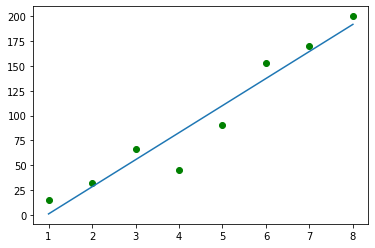

In [13]:
ax = plt.subplots()
plt.scatter(x, y, c='green')
plt.plot(x, _m * x + _b)

Write a function to generate linear regression model based on 2 vectors
<br/>
use a closure to generate a function dynamically

In [22]:
def getlinear(x,y):
 
    N = len(x)

    def inner(x1):
        return _m * x1 + _b
    
    m = (N * np.sum(x*y) - np.sum(x) * np.sum(y)) / (N * np.sum(x*x) - np.sum(x) * np.sum(x))
    b = (np.sum(y) - m *np.sum(x)) / N
    return inner

predict = getlinear(x,y)    

Test your function

In [23]:
predict(1.5)

14.55357142857143

Use linear algebra package from numpy to do the same task

Regression Coefficients: [25.07142857]


0.9045784459831488

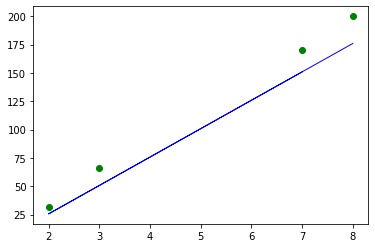

In [32]:
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split

regr = linear_model.LinearRegression()

X = x.reshape(-1,1)
Y = y.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=1)

regr.fit(X_train, y_train) 
print('Regression Coefficients: {}'.format(regr.coef_[0])) 

y_pred = regr.predict(X_test)

plt.scatter(X_test, y_test,  color='green')
plt.plot(X_test, y_pred, color='blue', linewidth=1)

regr.score(X, y)